In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# using Boyer-Moore Majority Voting Algorithm
def find_majority(arr):
    vote = 0
    candidate = None

    for i in range(len(arr)):
        if vote == 0:
            candidate = arr[i]
            vote = 1
        else:
            if arr[i] == candidate:
                vote += 1
            else:
                vote -= 1
    return candidate

def knn_predict(X_train, y_train, x_test, k):
    distances = []

    # Compute distances from the test instance to all training instances
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], x_test)
        distances.append((distance, y_train.iloc[i]))

    # Sort the distances in ascending order
    distances.sort(key=lambda x: x[0])

    # Select the k nearest neighbors
    k_nearest_neighbors = distances[:k]

    # Get the labels of the k nearest neighbors
    k_nearest_labels = [label for _, label in k_nearest_neighbors]
    
    # Find the most common label (majority vote)
    most_common_label = find_majority(k_nearest_labels)

    return most_common_label

In [2]:
# Load dataset
data = pd.read_csv(r'E:\COLLEGE RESOURCES\Semister 5\machine learning lab\diabetes.csv')

# Split the dataset into features and target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (the last column)

# Normalize features to ensure equal weight in distance calculation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to store accuracy for different values of k
k_values = range(1, 21)
accuracies = []

# Evaluate for different k values and store accuracy
for k in k_values:
    correct_predictions = 0
    y_pred = []
    y_actual = []

    for i in range(len(X_test)):
        predicted_label = knn_predict(X_train, y_train, X_test[i], k)
        actual_label = y_test.iloc[i]
        y_pred.append(predicted_label)
        y_actual.append(actual_label)

        if predicted_label == actual_label:
            correct_predictions += 1

    accuracy = correct_predictions / len(X_test)
    accuracies.append(accuracy)

# Plot the curve for accuracy vs k
plt.figure()
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\COLLEGE RESOURCES\\Semister 5\\machine learning lab\\diabetes.csv'

Best k: 19, Accuracy: 75.97%
Precision: 0.71
Recall: 0.55
F1 Score: 0.62

Confusion Matrix:
TP: 30, FP: 12, TN: 87, FN: 25


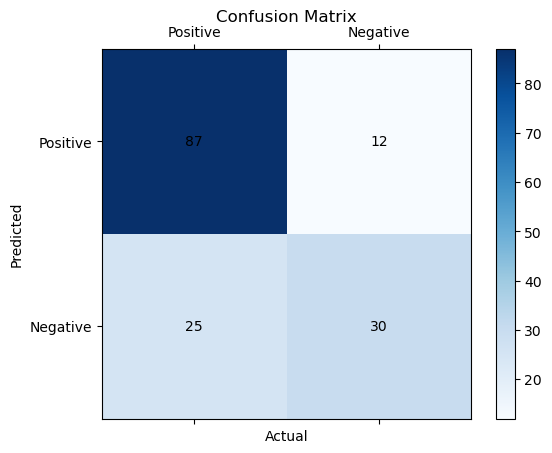

In [14]:
# Using the best k (highest accuracy)
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k}, Accuracy: {max(accuracies) * 100:.2f}%")

# Predict using the best k
correct_predictions = 0
y_pred = []
y_actual = []

for i in range(len(X_test)):
    predicted_label = knn_predict(X_train, y_train, X_test[i], best_k)
    actual_label = y_test.iloc[i]
    y_pred.append(predicted_label)
    y_actual.append(actual_label)
    
    if predicted_label == actual_label:
        correct_predictions += 1

# Manually calculate precision, recall, and F1 score
TP = FP = TN = FN = 0  # Initialize confusion matrix components

for i in range(len(y_pred)):
    if y_actual[i] == 1 and y_pred[i] == 1:
        TP += 1  # True Positive
    elif y_actual[i] == 0 and y_pred[i] == 1:
        FP += 1  # False Positive
    elif y_actual[i] == 0 and y_pred[i] == 0:
        TN += 1  # True Negative
    elif y_actual[i] == 1 and y_pred[i] == 0:
        FN += 1  # False Negative

# Precision, Recall, F1 Score calculations
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Confusion matrix
print(f"\nConfusion Matrix:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

# Plot confusion matrix with predicted on y-axis and actual on x-axis
confusion_matrix = np.array([[TN, FP], [FN, TP]])

fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix', pad=20)
fig.colorbar(cax)

# Label x and y axes with reversed "Positive" and "Negative"
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Set ticks and labels (1 = Positive, 0 = Negative)
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.yticks([0, 1], ['Positive', 'Negative'])

# Annotate each cell with count
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')

plt.show()
